In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
col = df.columns
col

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for i in col:
    if df[i].dtypes != int and df[i].dtypes != float:
        print(i)

Name
Occupation
Type_of_Loan
Credit_Mix
Payment_of_Min_Amount
Payment_Behaviour
Credit_Score


In [5]:
label_encoder = LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Payment_Behaviour'] = label_encoder.fit_transform(df['Payment_Behaviour'])
df['Type_of_Loan'] = label_encoder.fit_transform(df['Type_of_Loan'])
df['Credit_Mix'] = label_encoder.fit_transform(df['Credit_Mix'])
df['Payment_of_Min_Amount'] = label_encoder.fit_transform(df['Payment_of_Min_Amount'])

In [6]:
db = df.drop(['ID','Name'],axis=1)

In [7]:
a = db.Credit_Score.unique()
print(a)
db.Credit_Score = db.Credit_Score.replace(a,[0,1,2])

['Good' 'Standard' 'Poor']


<Axes: >

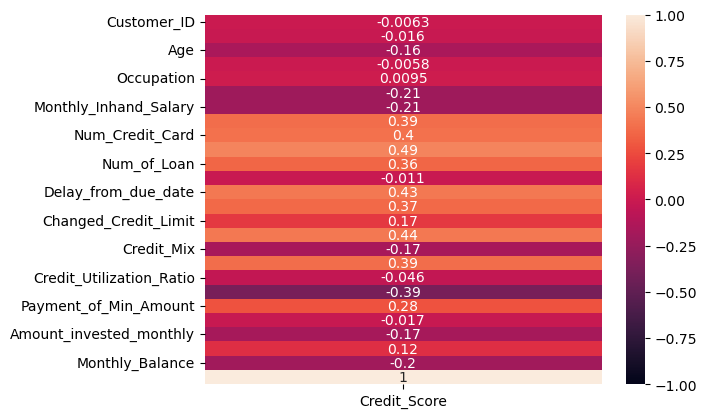

In [8]:
import seaborn as sns
sns.heatmap(db.corr()['Credit_Score'].to_frame() ,annot=True, vmin=-1, vmax=1)

In [9]:
db.corr()['Credit_Score']

Customer_ID                -0.006337
Month                      -0.016291
Age                        -0.160371
SSN                        -0.005825
Occupation                  0.009549
Annual_Income              -0.212606
Monthly_Inhand_Salary      -0.209761
Num_Bank_Accounts           0.388165
Num_Credit_Card             0.404435
Interest_Rate               0.485409
Num_of_Loan                 0.358355
Type_of_Loan               -0.011230
Delay_from_due_date         0.431446
Num_of_Delayed_Payment      0.372978
Changed_Credit_Limit        0.170649
Num_Credit_Inquiries        0.435113
Credit_Mix                 -0.168909
Outstanding_Debt            0.386525
Credit_Utilization_Ratio   -0.045793
Credit_History_Age         -0.388788
Payment_of_Min_Amount       0.278127
Total_EMI_per_month        -0.016572
Amount_invested_monthly    -0.172225
Payment_Behaviour           0.118732
Monthly_Balance            -0.197728
Credit_Score                1.000000
Name: Credit_Score, dtype: float64

In [10]:
db = db.drop(['Customer_ID','Month','SSN'],axis=1)
db.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,0
1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,0
2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,0
3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,5.0,...,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,0
4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,6.0,...,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = db['Credit_Score']
X = db.drop(['Credit_Score'],axis=1)
st = StandardScaler()
X_ = st.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
accuracy_score(y_test,y_pred)

0.6482

In [13]:
# bagging
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.81745

In [ ]:
pd.DataFrame({'Acutal':y_test,"Predicted":y_pred}).replace([0,1,2],a)

In [14]:
%%time
# boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7144

In [ ]:
# DNN
import tensorflow as tf
from tensorflow.keras import layers, models

# One-hot encode the target variable
y_train_ = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_ = tf.keras.utils.to_categorical(y_test, num_classes=3)

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='selu'))  
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='selu'))  
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))  
model.add(layers.Dense(3, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_, epochs=20, batch_size=64, validation_split=0.2,)

test_loss, test_accuracy = model.evaluate(X_test, y_test_)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/20
1000/1000 [==============================] - 2s 1ms/step - loss: 0.7811 - accuracy: 0.6385 - val_loss: 0.6812 - val_accuracy: 0.6893
Epoch 2/20
1000/1000 [==============================] - 1s 1ms/step - loss: 0.7131 - accuracy: 0.6811 - val_loss: 0.6752 - val_accuracy: 0.6956
Epoch 3/20
 168/1000 [====>.........................] - ETA: 0s - loss: 0.7008 - accuracy: 0.6871

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y = model.predict(X_test)

In [ ]:
y_pred = []
for i in range(0,len(X_test)):
    s = np.argmax(y[i])
    y_pred.append(s)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
pd.DataFrame({'Acutal':y_test,"Predicted":y_pred}).replace([0,1,2],a)
